# Prophet

In [1]:
import pandas as pd
from fbprophet import Prophet
from coinpaprika import client as Coinpaprika
import numpy as np

In [2]:
def prep_transform(data,n_input, n_out):
    x, y = [],[]
    in_start = 0
    for _ in range(len(data)):
        in_end = in_start + n_input
        out_end = n_out + in_end
        if (out_end < len(data)):
            x_inp = data[in_start: in_end].reshape((n_input, 1))
            x.append(x_inp)
            y_inp = data[in_end: out_end, 0]
            y.append(y_inp)
        in_start = in_start + 1 
    return np.array(x), np.array(y)

In [3]:
coins = ["btc-bitcoin","eth-ethereum","usdt-tether","ltc-litecoin","doge-dogecoin"]

In [4]:
def load_year(year, coin):
    client = Coinpaprika.Client()
    data = pd.DataFrame(client.candles(coin, start="{}-01-11T00:00:00Z".format(year), 
                                       end = "{}-04-11T00:00:00Z".format(year+1)))
    dates = []
    times = []
    for i in range(len(data["time_close"])):
        d, t = data["time_close"][i].split("T")
        dates.append(d)
        times.append(t)
    
    dates = np.array(dates, dtype = "datetime64" )
    yval = data["close"].values.reshape(-1,1)
    return yval, dates

In [47]:
dfs = []
for coin in coins:
    y1, d1 = load_year(2020, coin)
    y2, d2 = load_year(2019, coin)
    y3, d3 = load_year(2018, coin)
    
    y = np.concatenate((y3, y2, y1))
    d = np.concatenate((d3, d2, d1))
    df_dict = {
        "ds": d,
        "y": y.reshape(len(y))
    }
    df = pd.DataFrame(df_dict)
    dfs.append(df)

In [21]:
import matplotlib.pyplot as plt

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


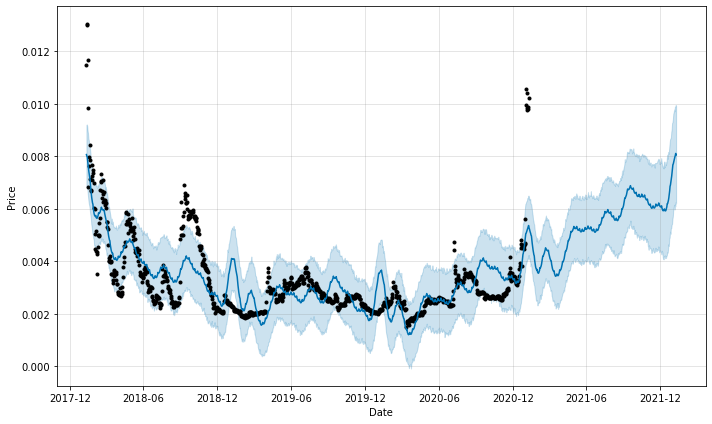

In [30]:
i = 4
model = Prophet()
model.fit(dfs[i])
future = model.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# Python
fig1 = model.plot(forecast)
plt.ylabel("Price")
plt.xlabel("Date")
fig1.savefig('{}.png'.format(coins[i]))

Text(0.5, 0, 'X axis label')

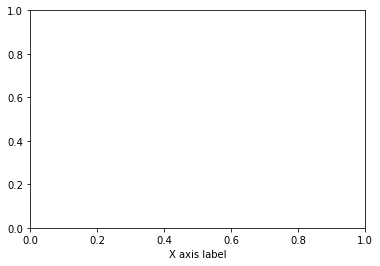

In [25]:
#fig1.set_ylabel('Price')
fig1
plt.xlabel("X axis label")

In [16]:
fig1.savefig('btc-btcoin.png')

In [14]:
type(fig1)

matplotlib.figure.Figure

In [11]:
forecast.to_csv("btc-bitcoin.csv")

In [13]:
for i in range(1,5):
    model = Prophet()
    model.fit(dfs[i])
    future = model.make_future_dataframe(periods=365)
    future.tail()
    # Python
    forecast = model.predict(future)
    forecast.to_csv("{}.csv".format(coins[i]))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
dfs[1]

,ds,y
0,2018-01-11,1154.930000
1,2018-01-12,1273.200000
2,2018-01-13,1396.420000
3,2018-01-14,1366.770000
4,2018-01-15,1291.920000
...,...,...
1090,2021-01-05,1104.832203
1091,2021-01-06,1206.558706
1092,2021-01-07,1227.643927
1093,2021-01-08,1221.304036


In [78]:
i = 4
df = dfs[i]

In [79]:
df.columns

Index(['ds', 'y'], dtype='object')

In [80]:

df.rename(columns = {"ds": "Date", "y": "Price"}, inplace = False)

,Date,Price
0,2018-01-11,0.011469
1,2018-01-12,0.013056
2,2018-01-13,0.013023
3,2018-01-14,0.011685
4,2018-01-15,0.009857
...,...,...
1090,2021-01-05,0.009838
1091,2021-01-06,0.010433
1092,2021-01-07,0.009807
1093,2021-01-08,0.009867


           Date     Price   Log_Ret  Volatility
1080 2020-12-26  0.004523 -0.014136    0.843453
1081 2020-12-27  0.004579  0.012109    0.843500
1082 2020-12-28  0.004594  0.003314    0.842312
1083 2020-12-29  0.004482 -0.024665    0.842743
1084 2020-12-30  0.004664  0.039859    0.843302
1085 2020-12-31  0.004709  0.009666    0.843051
1086 2021-01-01  0.005596  0.172447    0.859857
1087 2021-01-02  0.010564  0.635480    1.066811
1088 2021-01-03  0.009958 -0.059161    1.065972
1089 2021-01-04  0.009782 -0.017800    1.066162
1090 2021-01-05  0.009838  0.005759    1.066115
1091 2021-01-06  0.010433  0.058648    1.065501
1092 2021-01-07  0.009807 -0.061804    1.067004
1093 2021-01-08  0.009867  0.006055    1.066728
1094 2021-01-09  0.010242  0.037316    1.067180


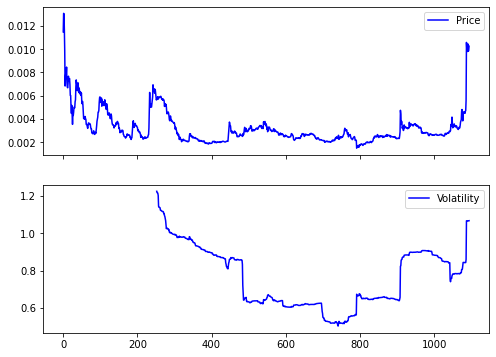

In [83]:
import pandas_datareader.data as web
import yfinance as yf

# Pull NIFTY data from Yahoo finance 
#NIFTY = yf.download('^NSEI',start='2012-6-1', end='2016-6-1')

df = df.rename(columns = {"ds": "Date", "y": "Price"}, inplace = False)
# # Compute the logarithmic returns using the Closing price 
df['Log_Ret'] = np.log(df['Price'] / df['Price'].shift(1))

#Compute Volatility using the pandas rolling standard deviation function
df['Volatility'] = df['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
print(df.tail(15))

# # Plot the NIFTY Price series and the Volatility
df[['Price', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))
plt.savefig('Volatility_{}.png'.format(coins[i]), dpi = 100)

In [82]:
plt.savefig('Volatility_{}.png'.format(coins[i]), dpi = 100)

<Figure size 432x288 with 0 Axes>

In [60]:
 yf.download('^NSEI',start='2012-6-1', end='2016-6-1')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-01,4910.850098,4925.000000,4831.750000,4841.600098,4841.600098,0
2012-06-04,4797.299805,4858.299805,4770.350098,4848.149902,4848.149902,0
2012-06-05,4869.450195,4898.950195,4847.700195,4863.299805,4863.299805,0
2012-06-06,4886.649902,5010.450195,4886.149902,4997.100098,4997.100098,0
2012-06-07,5035.350098,5059.649902,5007.750000,5049.649902,5049.649902,0
...,...,...,...,...,...,...
2016-05-26,7974.450195,8083.000000,7948.500000,8069.649902,8069.649902,264300
2016-05-27,8081.950195,8164.200195,8077.049805,8156.649902,8156.649902,260900
2016-05-30,8166.500000,8200.000000,8150.799805,8178.500000,8178.500000,247400
